In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# Set the seed
random.seed(44)

In [2]:
def data_clean(x0,scale):
    # Assuming each line has 12 data points and 1 label
    column_names = [f'x_{i}' for i in range(1, 13)] + ['y']
    df = pd.read_csv('hw1_train.dat', sep=' ', names=column_names, engine='python')
    df = df.dropna()
    
    # Extracting data points
    data = df.iloc[:, :-1].values
    data = np.insert(data, 0, x0, axis=1)
    data = scale * data
    
    # Extracting labels
    labels = df['y'].values

    return data, labels

In [3]:
def sign(x): 
    if x == 0: 
        return -1 ### set sign(0) = -1
    else:
        return int(math.copysign(1, x))

In [4]:
def pla(data, labels):
    w_final = []
    update_list = []
    w0 = np.zeros(len(data[0]))
    N = 256
    
    for i in range(1000):
        w_temp = w0
        random_index_w0 = random.randint(0, len(data) - 1)
        w_temp = w_temp + labels[random_index_w0] * data[random_index_w0] ## no check w(0), w(0) always false
        update = 0
        time = 1

        while True:
            random_index = random.randint(0, len(data) - 1)
            number = np.dot(w_temp, data[random_index])
            
            #update
            if sign(number) != labels[random_index]:
                w_temp = w_temp + labels[random_index] * data[random_index]
                time = 0
                update += 1

            else:
                time += 1
            
            
            # end condition
            if time == 5*N:
                break

        update_list.append(update)
        
    return update_list

現在的問題
1. 要不要check w = 0, 初始狀態？目前直接當他是錯的
2. 第12題的程式邏輯是什麼？隨機抓一個點，抓到後更新到是對的，然後總共要對 5*N 次

In [5]:
def pla_var(data, labels):
    w_final = []
    update_list = []
    w0 = np.zeros(len(data[0]))
    N = 256
    
    for i in range(1000): # 1000 experiments
        w_temp = w0
        random_index_w0 = random.randint(0, len(data) - 1)
        w_temp = w_temp + labels[random_index_w0] * data[random_index_w0] ## no check w(0), w(0) always false
        update = 0
        time = 1

        while True:
            random_index = random.randint(0, len(data) - 1)
            number = np.dot(w_temp, data[random_index])
                
            #keep update until this example is correct
            if sign(number) != labels[random_index]:
                while True:
                    w_temp = w_temp + labels[random_index] * data[random_index]
                    update += 1
                    if sign(np.dot(w_temp, data[random_index])) == labels[random_index]:
                        time = 1
                        break

            else:
                time += 1
        
            # end condition
            if time == 5*N:
                break

        update_list.append(update)
        
    return update_list

In [6]:
def plot(update):
    # 使用plt.hist()繪製直方圖
    plt.hist(update, bins=20, edgecolor='black')  # bins 參數決定有多少柱狀，你可以根據需要調整

    plt.title("Histogram of update")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.show()  # 顯示圖形

In [7]:
def find_median(lst):
    sorted_lst = sorted(lst)
    n = len(sorted_lst)
    
    if n % 2 == 1:  # 奇數
        return sorted_lst[n // 2]
    else:  # 偶數
        left_mid = sorted_lst[(n - 1) // 2]
        right_mid = sorted_lst[n // 2]
        return (left_mid + right_mid) / 2

### 第九題

1057.5


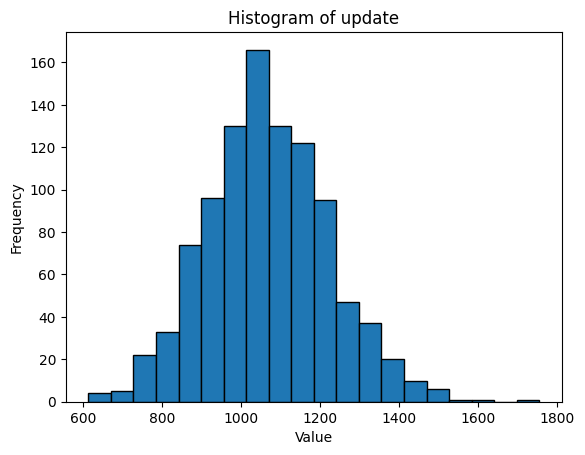

In [10]:
data9, labels9 = data_clean(1, 1)
update9 = pla(data9, labels9)
print(find_median(update9))
plot(update9)

### 第十題

1069.0


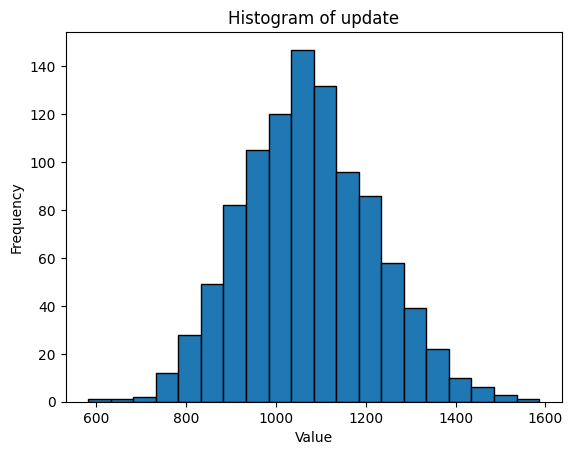

In [11]:
data10, labels10 = data_clean(1, 11.26)
update10 = pla(data10, labels10)
print(find_median(update10))
plot(update10)

### 第十一題

1029.5


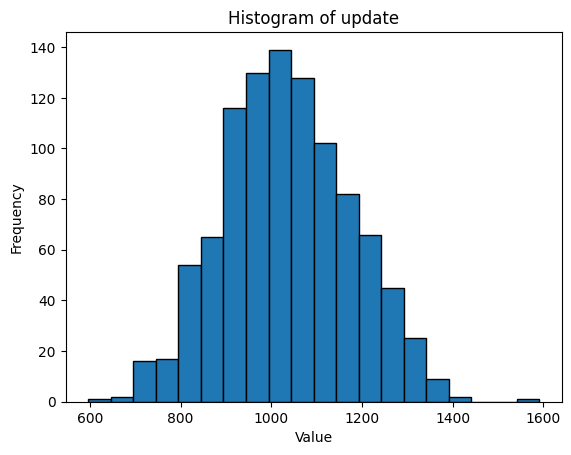

In [12]:
data11, labels11 = data_clean(11.26, 1)
update11 = pla(data11, labels11)
print(find_median(update11))
plot(update11)

### 第十二題

1061.5


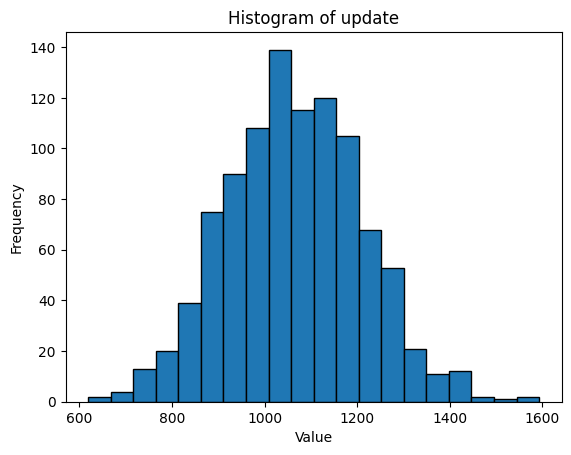

In [13]:
data12, labels12 = data_clean(1, 1)
update12 = pla_var(data12, labels12)
print(find_median(update12))
plot(update12)